# **Analisis Faktor-faktor yang Mempengaruhi Kepuasan Pengguna Pada kursus kursus yang ada di Udemy**

In [2]:
import pandas as pd
# read dataset
df = pd.read_csv("udemy_online_education_courses_dataset.csv")

df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


### **Week 10: Random Variable and Probability Distribution**

##### **Analisis Faktor Banyaknya Subscribers pada suatu kursus.**

In [3]:
# Menghitung banyaknya jenis subject yang ada di Udemy
subject_type = df["subject"].unique()
print("Banyaknya subject: ")
print(subject_type)

Banyaknya subject: 
['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']


In [4]:
# Banyaknya kursus tiap subject
course_count = df["subject"].value_counts()
print("Banyaknya kursus tiap subject: ")
print(course_count)

Banyaknya kursus tiap subject: 
subject
Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64


In [5]:
# Subscriber tiap subject
subscriber_group = df.groupby("subject")["num_subscribers"].sum()
print("Jumlah subscriber per subject:")
print(subscriber_group)
paid_course = df.groupby("is_paid")["subject"].value_counts()
print(paid_course)

Jumlah subscriber per subject:
subject
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Web Development        7980572
Name: num_subscribers, dtype: int64
is_paid  subject            
False    Web Development         133
         Business Finance         96
         Musical Instruments      46
         Graphic Design           35
True     Business Finance       1099
         Web Development        1067
         Musical Instruments     634
         Graphic Design          568
Name: count, dtype: int64


1. **Statistika Deskriptif**

In [6]:
df["num_subscribers"].describe()

count      3678.000000
mean       3197.150625
std        9504.117010
min           0.000000
25%         111.000000
50%         911.500000
75%        2546.000000
max      268923.000000
Name: num_subscribers, dtype: float64

2. **Uji Distribusi Probabilitas**

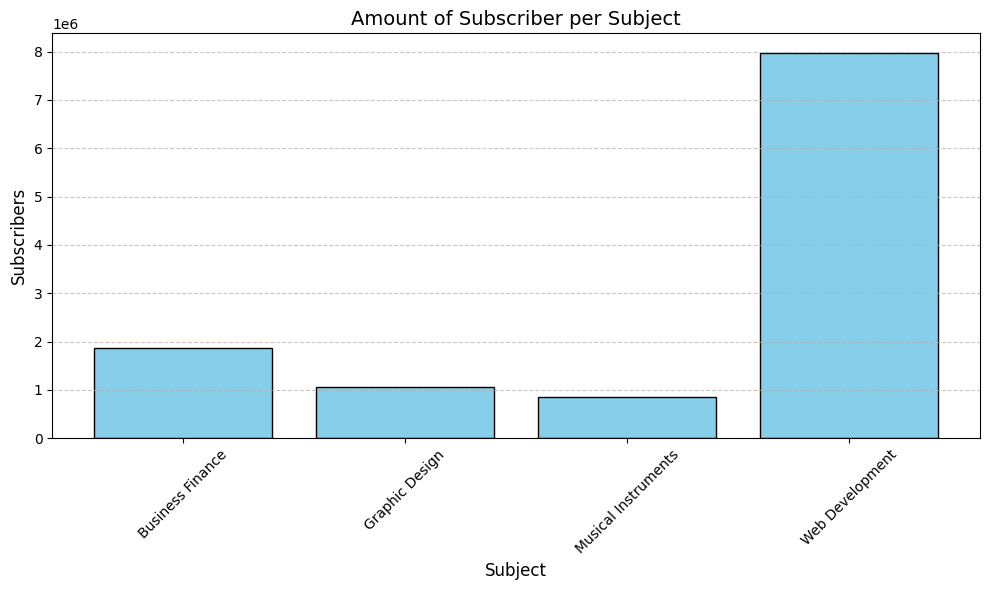

In [7]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6))
plt.bar(subscriber_group.index, subscriber_group.values, color="skyblue", edgecolor="black")
plt.title("Amount of Subscriber per Subject", fontsize=14)
plt.xlabel("Subject", fontsize=12)
plt.ylabel("Subscribers", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [8]:
from scipy.stats import shapiro

stat, p = shapiro(df["num_subscribers"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data mengikuti distribusi normal')
else:
    print('Data tidak mengikuti distribusi normal')

Statistics=0.300, p=0.000
Data tidak mengikuti distribusi normal


3. **Menghitung Probabilitas**

Jika data tidak berdistribusi normal, kita dapat menghitung probabilitas salah satunya dengan metode empiris. dengan menghitung proporsi data yang memenuhi kriteria (misalnya X > 1000) dari total data, tanpa asumsi distribusi.

In [9]:
nA = len(df[df["num_subscribers"] > 1000])
nS = len(df)

print("nA = ", nA, "nS = ", nS)
probabilitas_empiris = nA / nS * 100
print(f"Probabilitas empiris (subscribers > 1000): {probabilitas_empiris:.2f}%")

nA =  1770 nS =  3678
Probabilitas empiris (subscribers > 1000): 48.12%


##### **Analisis Faktor Harga Pada Kursus**